# Trabajo Practico 1
### 82.20 Analisis Predictivo Avanzado
### Bruno Soifer - Azul de los Angeles Makk

# EDA

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [73]:
datos = pd.read_csv("./dataset.csv")
datosFiltrados = datos[datos['track_genre'].isin(['classical', 'metal', 'jazz', 'punk-rock',
                                                  'techno', 'reggae', 'sleep', 'trance',
                                                  'study', 'hip-hop'])]


In [74]:
print(datosFiltrados.describe())

datosNumericos = datosFiltrados[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
                                 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                                 'valence', 'tempo']]

         Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   10000.00000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean    80499.50000     30.486900  2.224682e+05      0.546592      0.594577   
std     28586.09889     25.234736  1.330844e+05      0.210089      0.301225   
min     16000.00000      0.000000  1.745300e+04      0.000000      0.000000   
25%     64499.75000      1.000000  1.560000e+05      0.418000      0.357000   
50%     86999.50000     35.000000  2.022830e+05      0.577500      0.664000   
75%    105499.25000     49.000000  2.549200e+05      0.712000      0.857000   
max    110999.00000     99.000000  4.120258e+06      0.964000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.297200    -10.379438      0.608900      0.078617      0.343085   
std        3.573283      7.673109      0.488021    

In [75]:
print(datosFiltrados.columns[datosFiltrados.isna().any()])

Index([], dtype='object')


In [76]:
scaler = MinMaxScaler()
dat_c = scaler.fit_transform(datosNumericos)
dat_c = pd.DataFrame(dat_c, columns=datosNumericos.columns)

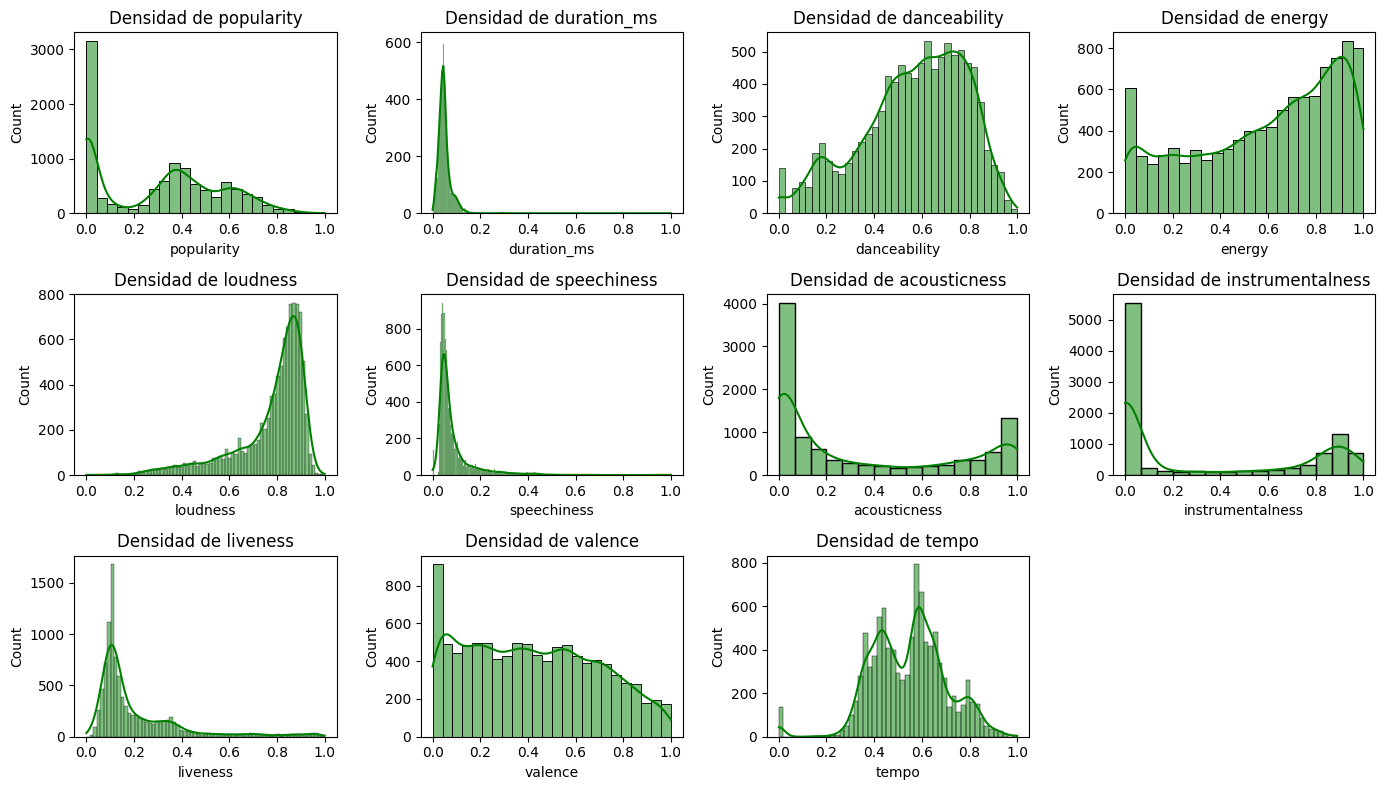

In [77]:
# Densidad de variables numericas
plt.figure(figsize=(14, 8))
for i, colname in enumerate(dat_c.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(dat_c[colname], kde=True, color='green', alpha=0.5)
    plt.title(f"Densidad de {colname}")
plt.tight_layout()
plt.show()

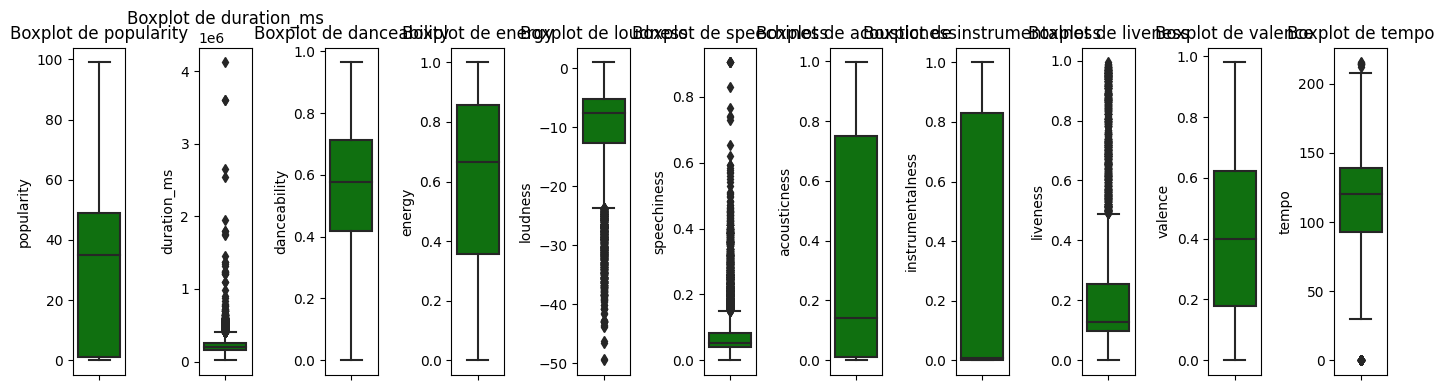

In [78]:
# Análisis de outliers
num_cols = len(datosNumericos.columns)
plt.figure(figsize=(14, 4))
for i, colname in enumerate(datosNumericos.columns):
    plt.subplot(1, num_cols, i+1)
    sns.boxplot(y=datosNumericos[colname], color='green')
    plt.title(f"Boxplot de {colname}")
plt.tight_layout()
plt.show()

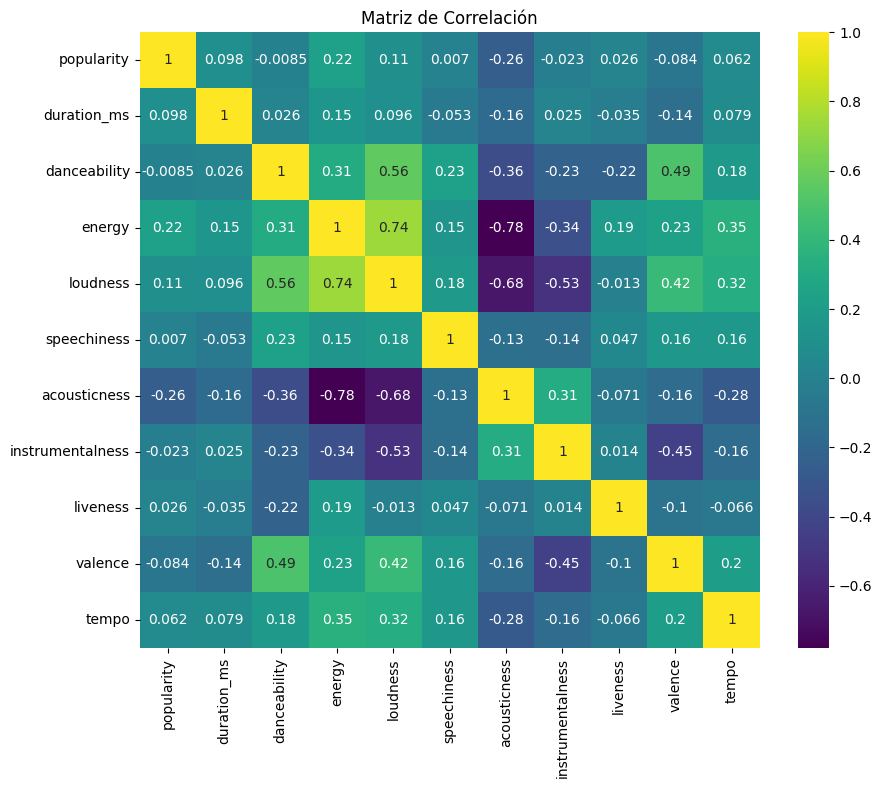

In [79]:
# Matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(datosNumericos.corr(), annot=True, cmap='viridis')
plt.title("Matriz de Correlación")
plt.show()

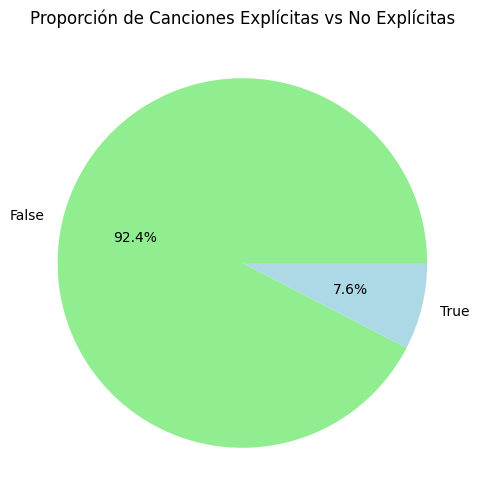

In [80]:
# Pie chart de proporcion explicit
plt.figure(figsize=(6, 6))
datosFiltrados['explicit'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
plt.title("Proporción de Canciones Explícitas vs No Explícitas")
plt.ylabel("")
plt.show()

In [81]:
# Testing de hipótesis
## Se separa la data en dos grupos para realizar t-test.
grupo_1 = datosFiltrados[datosFiltrados['explicit'] == 'True']
grupo_2 = datosFiltrados[datosFiltrados['explicit'] == 'False']

In [82]:
## Se realiza el t-test
test_result = ttest_ind(grupo_1['popularity'], grupo_2['popularity'])
print("Test de Hipótesis:")
print(test_result)

Test de Hipótesis:
Ttest_indResult(statistic=nan, pvalue=nan)


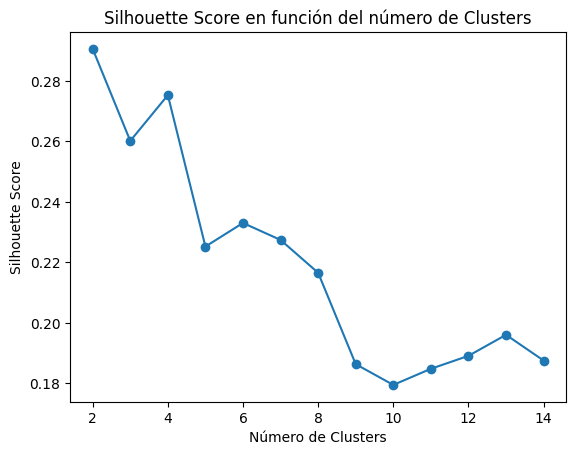

In [83]:
# Clustering jerárquico
## Se escoge el número óptimo de clusters
k = 15
k_vec = np.arange(2, k)
silhouette_vec = np.zeros(k-2)
for i in range(0, k-2):
    modelo = AgglomerativeClustering(n_clusters=i+2)
    modelo.fit(dat_c)
    labels = modelo.labels_
    silhouette_vec[i] = silhouette_score(dat_c, labels)

plt.plot(k_vec, silhouette_vec, marker='o')
plt.title("Silhouette Score en función del número de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [84]:
## Se realiza el clustering jerárquico
modelo = AgglomerativeClustering(n_clusters=6)
labels = modelo.fit_predict(dat_c)
dat_c['cluster'] = labels

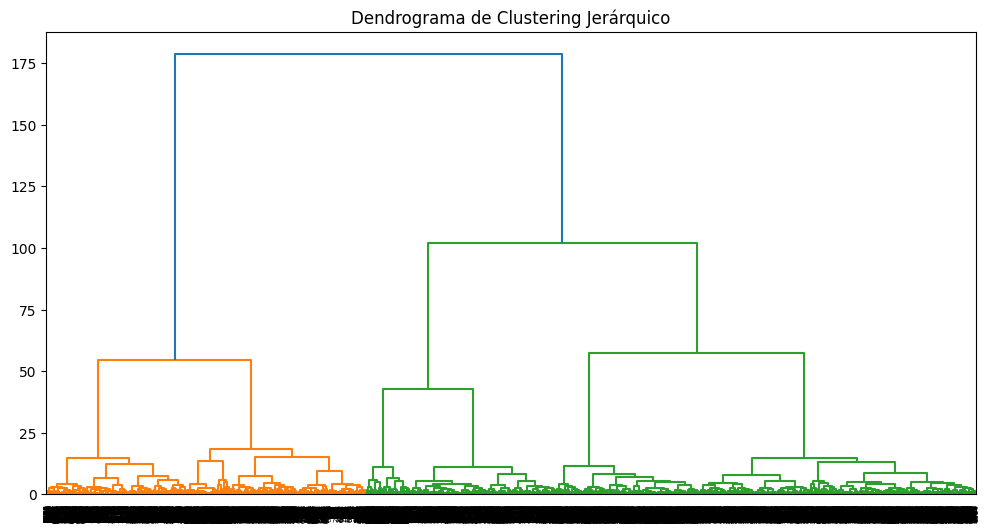

In [85]:
## Se visualiza el dendrograma
plt.figure(figsize=(12, 6))
plt.title("Dendrograma de Clustering Jerárquico")
Z = linkage(dat_c, 'ward')
dendrogram(Z)
plt.show()

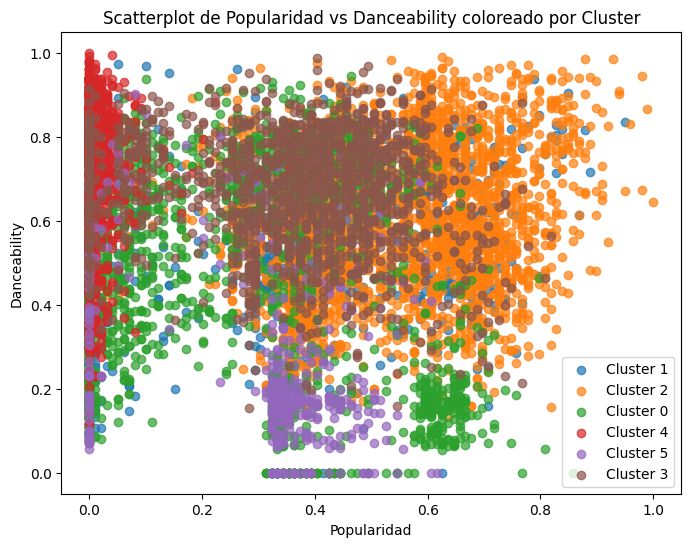

In [86]:
## Se hace un scatterplot de las observaciones coloreado por cluster
plt.figure(figsize=(8, 6))
for cluster in dat_c['cluster'].unique():
    plt.scatter(dat_c[dat_c['cluster']==cluster]['popularity'], 
                dat_c[dat_c['cluster']==cluster]['danceability'],
                label=f'Cluster {cluster}', alpha=0.7)
plt.title("Scatterplot de Popularidad vs Danceability coloreado por Cluster")
plt.xlabel("Popularidad")
plt.ylabel("Danceability")
plt.legend()
plt.show()

In [87]:
## Se hace un resumen de la media de las variables numéricas por cluster
resumen_cluster = dat_c.groupby('cluster').agg('mean').reset_index()
print(resumen_cluster)

   cluster  popularity  duration_ms  danceability    energy  loudness  \
0        0    0.256777     0.038960      0.426209  0.194176  0.581069   
1        1    0.201443     0.047009      0.519081  0.358023  0.740808   
2        2    0.522374     0.049985      0.602125  0.795742  0.865098   
3        3    0.365634     0.068799      0.668657  0.738250  0.818355   
4        4    0.010197     0.047172      0.703886  0.739353  0.870925   
5        5    0.312977     0.052057      0.278840  0.779096  0.636611   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  
0     0.072756      0.809115          0.833138  0.167761  0.273334  0.464246  
1     0.064767      0.765234          0.032702  0.180767  0.461415  0.510470  
2     0.100247      0.090007          0.018364  0.240674  0.527450  0.594511  
3     0.072063      0.059948          0.741585  0.147891  0.310580  0.590602  
4     0.118981      0.117659          0.012036  0.167661  0.566589  0.565011  
5     0.072330

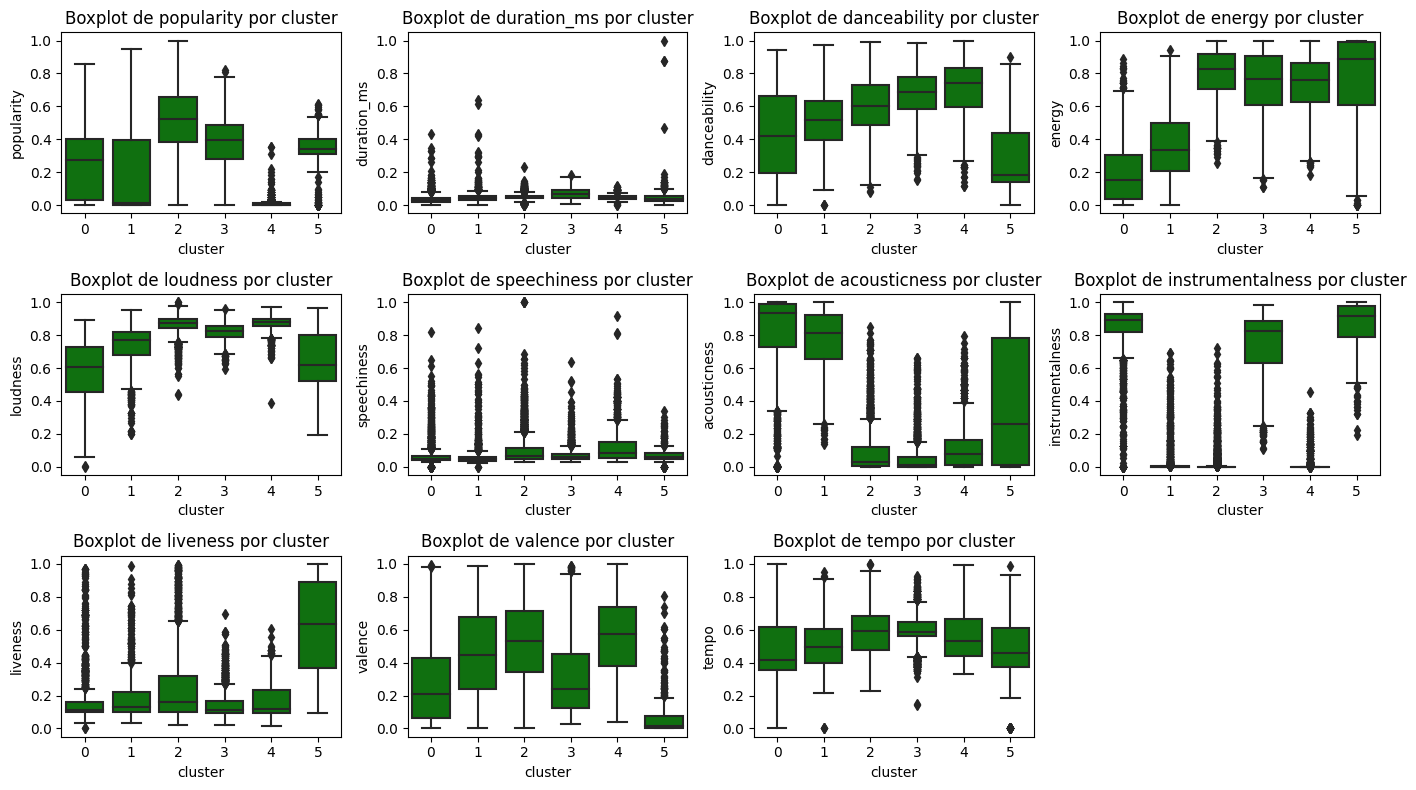

In [88]:
## Se hace un boxplot de las variables numéricas por cluster
plt.figure(figsize=(14, 8))
for i, colname in enumerate(datosNumericos.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='cluster', y=colname, data=dat_c, color='green')
    plt.title(f"Boxplot de {colname} por cluster")
plt.tight_layout()
plt.show()

# Encoders

In [89]:
df = datosFiltrados.copy()
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['track_id'], axis=1)

In [90]:
print(df.columns)

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


In [91]:
def label_encoder(data):
    le = LabelEncoder()
    encoded_data = le.fit_transform(data)
    return encoded_data

In [92]:
df['track_genre_encoded'] = label_encoder(df['track_genre'])

print(df[['track_genre', 'track_genre_encoded']])
df = df.drop(['track_genre'], axis=1)

       track_genre  track_genre_encoded
16000    classical                    0
16001    classical                    0
16002    classical                    0
16003    classical                    0
16004    classical                    0
...            ...                  ...
110995      trance                    9
110996      trance                    9
110997      trance                    9
110998      trance                    9
110999      trance                    9

[10000 rows x 2 columns]


In [93]:
df['artists_encoded'] = label_encoder(df['artists'])

print(df[['artists', 'artists_encoded']])
df = df.drop(['artists'], axis=1)

                                                  artists  artists_encoded
16000                                     Bombay Jayashri              536
16001   Shankar;Ehsaan;Loy;Alisha Chinai;Shankar Mahad...             2811
16002                            Bombay Jayashri;DJ Aftab              537
16003                                     Bombay Jayashri              536
16004                            Bombay Jayashri;Swattrex              540
...                                                   ...              ...
110995                                   NG Rezonance;PHD             2162
110996                                   NG Rezonance;PHD             2162
110997                                NG Rezonance;Begbie             2159
110998                                       NG Rezonance             2156
110999                                       NG Rezonance             2156

[10000 rows x 2 columns]


In [94]:
df.drop(['track_name', 'album_name'], axis=1, inplace=True)

In [95]:
df['explicit'] = df['explicit'].astype(int)

In [96]:
columns_with_nas = df.columns[df.isna().any()].tolist()

if columns_with_nas:
    print("Columns with missing values:", columns_with_nas)
else:
    print("No missing values found in any column.")

No missing values found in any column.


In [99]:
columns_to_scale = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = datosFiltrados.drop(columns=['explicit']) 
y = datosFiltrados['explicit']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train[columns_to_scale])

X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])